## Set up the environment

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
import warnings

warnings.filterwarnings("ignore")

# Set the environment
np.random.seed(1234)
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Data Loading

In [2]:
# Load XLSX file
file_path = 'E:/backup17092018/Myappdir/Myprojects/Data Science/Tableau Employee Attrition/'
file_name = 'IBM-HR-Employee-Attrition.xlsx'

df = pd.read_excel(file_path+file_name, header=0)

## Data Exploration

In [3]:
df.shape

(1470, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   EmployeeID                1470 non-null   int64         
 1   Age                       1470 non-null   int64         
 2   Attrition                 1470 non-null   object        
 3   AttritionDate             237 non-null    datetime64[ns]
 4   BusinessTravel            1470 non-null   object        
 5   DailyRate                 1470 non-null   int64         
 6   Department                1470 non-null   object        
 7   DistanceFromHome          1470 non-null   int64         
 8   Education                 1470 non-null   int64         
 9   EducationField            1470 non-null   object        
 10  EmployeeCount             1470 non-null   int64         
 11  EmployeeNumber            1470 non-null   int64         
 12  EnvironmentSatisfact

In [5]:
df.head()

,EmployeeID,Age,Attrition,AttritionDate,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,12920,41,Yes,2023-11-15,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,8750,49,No,NaT,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,6880,37,Yes,2023-06-29,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,2430,33,No,NaT,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,13740,27,No,NaT,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
df.tail()

,EmployeeID,Age,Attrition,AttritionDate,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,10220,36,No,NaT,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,4350,39,No,NaT,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,8810,27,No,NaT,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,4920,49,No,NaT,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,1620,34,No,NaT,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [7]:
# Show summary statistics
df.describe(include = 'all')

,EmployeeID,Age,Attrition,AttritionDate,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470,237,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,2,172,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,No,2023-10-09 00:00:00,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1233,5,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,2023-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2023-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7355.000000,36.923810,NaN,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,4244.967609,9.135373,NaN,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,10.000000,18.000000,NaN,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3682.500000,30.000000,NaN,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000


In [8]:
# Count the number of unique values for each column
n = df.nunique(axis=0)
 
print('No.of.unique values in each column:\n', n)

No.of.unique values in each column:
 EmployeeID                  1470
Age                           43
Attrition                      2
AttritionDate                172
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockO

In [9]:
# Show unique values for columns
for col in df.columns:
    print(col, len(df[col].unique()), df[col].unique())

EmployeeID 1470 [12920  8750  6880 ...  8810  4920  1620]
Age 43 [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition 2 ['Yes' 'No']
AttritionDate 173 ['2023-11-15T00:00:00.000000000'                           'NaT'
 '2023-06-29T00:00:00.000000000' '2023-11-30T00:00:00.000000000'
 '2023-09-24T00:00:00.000000000' '2023-12-12T00:00:00.000000000'
 '2023-10-15T00:00:00.000000000' '2023-10-11T00:00:00.000000000'
 '2023-05-27T00:00:00.000000000' '2023-10-09T00:00:00.000000000'
 '2023-01-12T00:00:00.000000000' '2023-07-10T00:00:00.000000000'
 '2023-12-07T00:00:00.000000000' '2023-04-30T00:00:00.000000000'
 '2023-08-06T00:00:00.000000000' '2023-10-16T00:00:00.000000000'
 '2023-07-18T00:00:00.000000000' '2023-03-10T00:00:00.000000000'
 '2023-11-04T00:00:00.000000000' '2023-06-07T00:00:00.000000000'
 '2023-10-24T00:00:00.000000000' '2023-04-15T00:00:00.000000000'
 '2023-03-20T00:00:00.000000000' '2023-06-27T

## Data Transformation

In [10]:
# Remove empty rows/columns
df.dropna(how="all", axis=0, inplace=True) # Rows
df.dropna(how="all", axis=1, inplace=True) # Columns

In [11]:
df.shape

(1470, 37)

In [12]:
# Remove duplicate rows
if df.duplicated().sum() > 0:
    df.drop_duplicates(keep='first', inplace=True)

In [13]:
# Remove leading and trailing spaces from 'object' (string) columns
for col in df.select_dtypes(['object']).columns:
    df[col] = df[col].str.strip()

In [14]:
# Remove non-numeric characters from numeric fields
numerical_features = df.select_dtypes(exclude=['object', 'datetime64[ns]'])

for feature in numerical_features:
    df[feature] = df[feature].astype(str).str.replace(r'[%,€,$, ]', '', regex=True).astype(float)

In [15]:
# Check for missing values
no_of_missing = df.isnull().sum()
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'No_of_missing':no_of_missing, 'Percent_missing': percent_missing})
missing_value_df

,No_of_missing,Percent_missing
EmployeeID,0,0.000000
Age,0,0.000000
Attrition,0,0.000000
AttritionDate,1233,83.877551
BusinessTravel,0,0.000000
DailyRate,0,0.000000
Department,0,0.000000
DistanceFromHome,0,0.000000
Education,0,0.000000
EducationField,0,0.000000


In [16]:
# Drop unwanted columns
df.drop('EmployeeNumber', axis=1, inplace=True)
df.drop('EmployeeCount', axis=1, inplace=True)
df.drop('StandardHours', axis=1, inplace=True)

In [17]:
# Replace Yes, No with 1, 0 in Attrition column
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [18]:
df.dtypes

EmployeeID                         float64
Age                                float64
Attrition                            int64
AttritionDate               datetime64[ns]
BusinessTravel                      object
DailyRate                          float64
Department                          object
DistanceFromHome                   float64
Education                          float64
EducationField                      object
EnvironmentSatisfaction            float64
Gender                              object
HourlyRate                         float64
JobInvolvement                     float64
JobLevel                           float64
JobRole                             object
JobSatisfaction                    float64
MaritalStatus                       object
MonthlyIncome                      float64
MonthlyRate                        float64
NumCompaniesWorked                 float64
Over18                              object
OverTime                            object
PercentSala

## Exploratory Data Analysis

Q1. What is the total number of employees?

In [19]:
total_employees = len(df['EmployeeID'].unique())
total_employees

1470

Q2. What is the total attrition rate?

In [20]:
attritions = df['Attrition'].sum()
attritions

attrition_rate = attritions / total_employees
attrition_rate
print('Attritions: ', str(attritions) + '\n' + 'Attrition Rate: ', str(attrition_rate))

Attritions:  237
Attrition Rate:  0.16122448979591836


Q3. What is the average years of tenure?

In [21]:
avg_years_tenure = df['YearsAtCompany'].mean()
avg_years_tenure

7.0081632653061225

Q4. In what quarter did employees leave?

<Axes: xlabel='AttritionDate'>

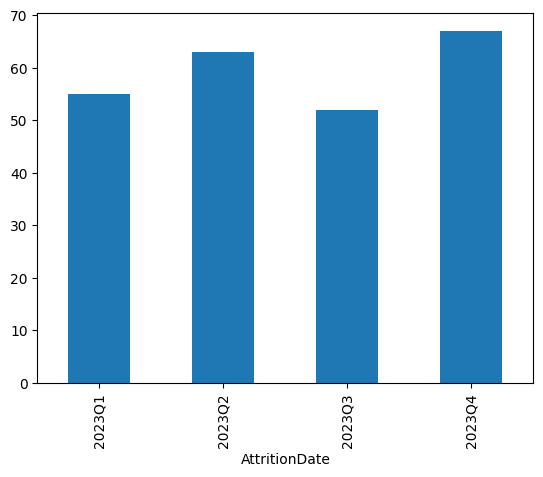

In [22]:
df.groupby(df['AttritionDate'].dt.to_period('Q'))['Attrition'].sum().plot.bar()

Q5. Which departments have the highest attrition rate?

<Axes: ylabel='Department'>

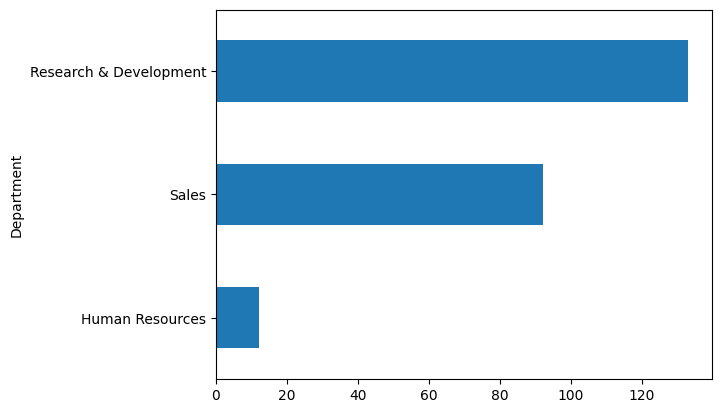

In [23]:
df.groupby(df['Department'])['Attrition'].sum().sort_values(ascending=True).plot.barh()

Q6. What are the attritions based on gender?

<Axes: ylabel='Attrition'>

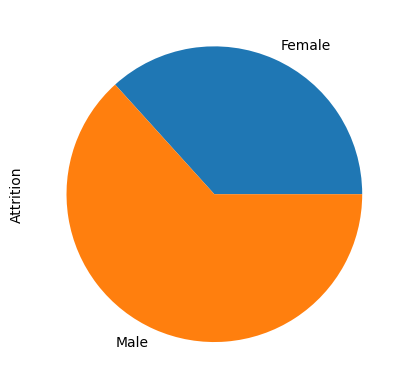

In [24]:
df.groupby(df['Gender'])['Attrition'].sum().sort_values(ascending=True).plot.pie()

Q7. Which positions have the highest attrition?

<Axes: ylabel='JobRole'>

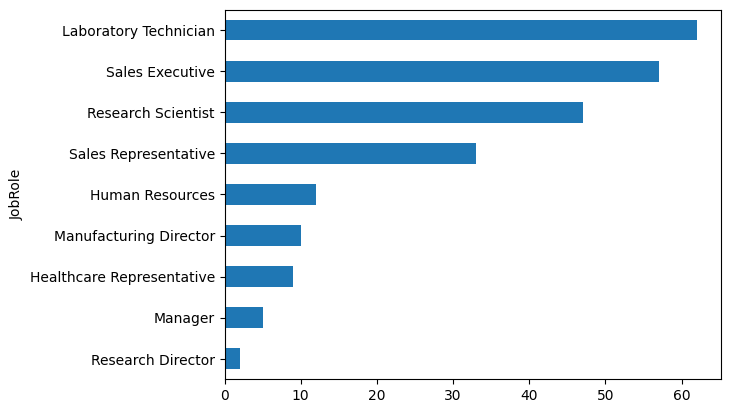

In [25]:
df.groupby(df['JobRole'])['Attrition'].sum().sort_values(ascending=True).plot.barh()

## Correllation Analysis

In [26]:
# Drop temporarily AttritionDate so it will not interfer with the modeling process
AttritionDateTemp = df['AttritionDate']
df.drop('AttritionDate', axis=1, inplace=True)

In [27]:
# Find the pearson correlations matrix
corr = df.corr(method='pearson')
corr

,EmployeeID,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,1.000000,-0.031175,0.040827,0.015767,0.028928,-0.013195,-0.002650,0.009023,0.005185,-0.006592,0.034446,-0.008874,-0.000624,-0.000968,-0.026728,-0.013631,-0.000557,-0.010537,-0.010141,-0.038937,0.006264,0.007169,0.026403,0.038101,0.023883
Age,-0.031175,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,0.040827,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.015767,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,0.028928,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,-0.013195,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,-0.002650,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.009023,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.005185,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,-0.006592,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


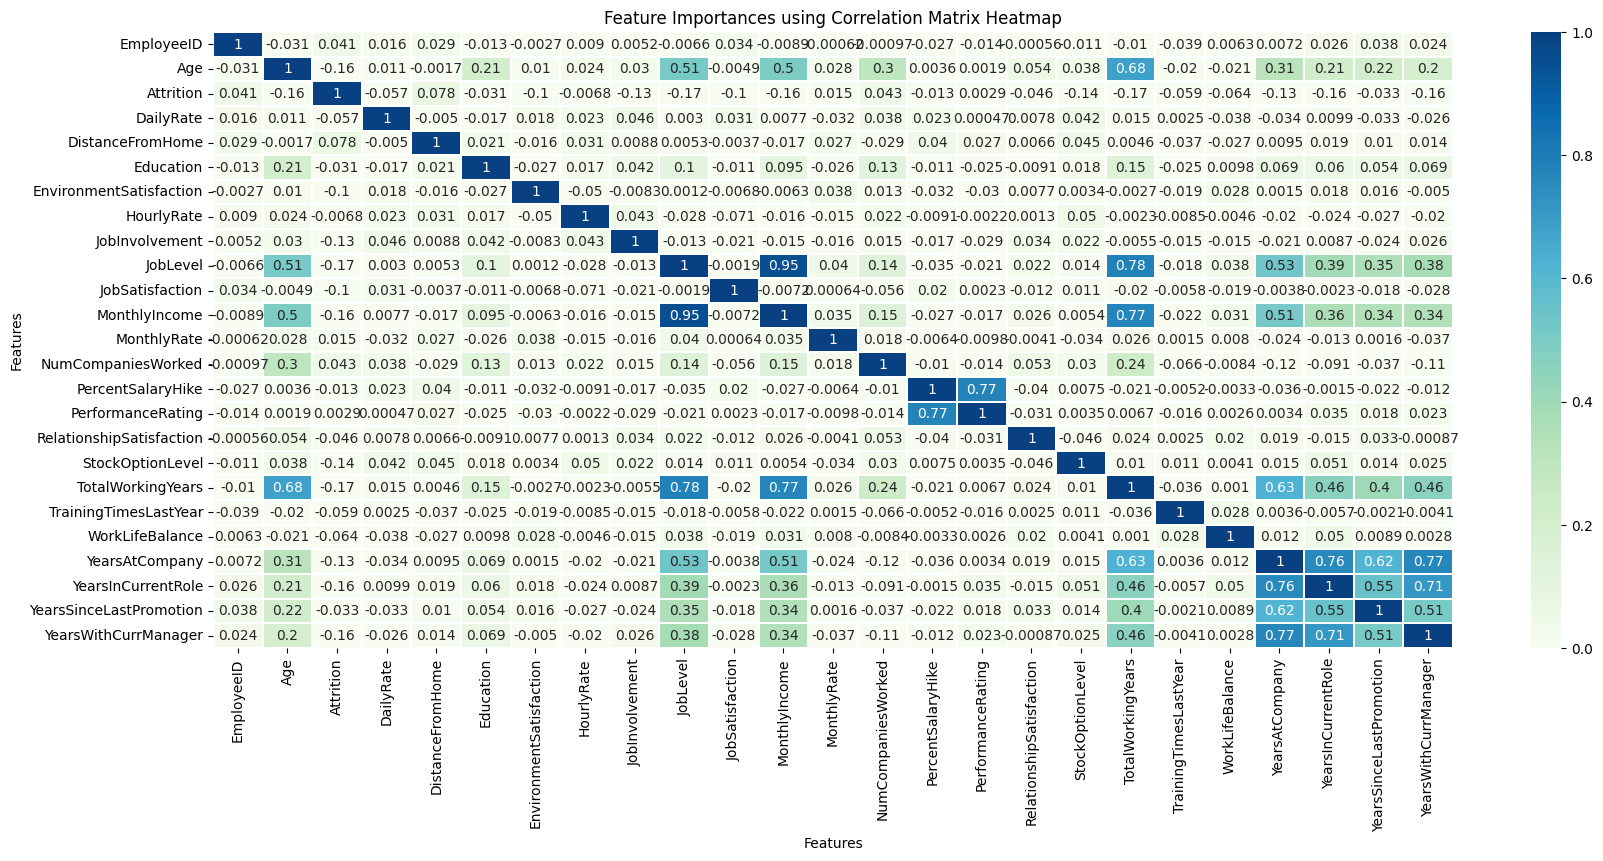

In [28]:
# Plot the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, cmap='GnBu', linewidths=0.2, vmin=0, vmax=1)
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Feature Importances using Correlation Matrix Heatmap')
plt.show()

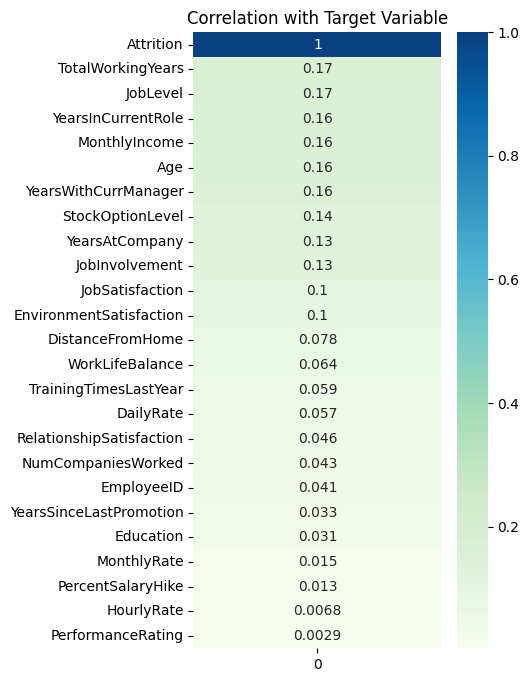

In [29]:
# Create a correlation matrix with target variable
corr_with_target = abs(df.corrwith(df['Attrition']))

# Sort features by correlation with target variable
corr_with_target = corr_with_target.sort_values(ascending=False)

# Plot the heatmap
plt.figure(figsize=(4, 8))
sns.heatmap(corr_with_target.to_frame(), cmap='GnBu', annot=True)
plt.title('Correlation with Target Variable')
plt.show()

## Build Model

In [30]:
# Perform One-Hot Encoding to prepare the data for ML
df_model = pd.get_dummies(df)

In [31]:
# Declare the independent variables (X) and the dependent variable(y)
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

In [32]:
X.columns

Index(['EmployeeID', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRo

In [33]:
# Generate the train and test partitions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [34]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1029, 53) (441, 53) (1029,) (441,)


## Perform predictions with different alogorithms

In [35]:
# LogisticRegression
lr = LogisticRegression(random_state=1234).fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# SVC
svc = SVC(random_state=1234).fit(X_train, y_train)
svc_pred = lr.predict(X_test)

# KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# RandomForestClassifier
rf = RandomForestClassifier(random_state=1234).fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=1234).fit(X_train, y_train)
gb_pred = gb.predict(X_test)

In [36]:
# Generate our evaluation metrics to find the best model
print("lr Accuracy: "+ str(lr.score(X,y)))
print("svc Accuracy: "+ str(svc.score(X,y)))
print("knn Accuracy: "+ str(knn.score(X,y)))
print("rf Accuracy: "+ str(rf.score(X,y)))
print("gb Accuracy: "+ str(gb.score(X,y)))

lr Accuracy: 0.8401360544217688
svc Accuracy: 0.8387755102040816
knn Accuracy: 0.8387755102040816
rf Accuracy: 0.9598639455782313
gb Accuracy: 0.9360544217687075


In [37]:
# Our best model is 'rf'. 
rf_pred_new = rf.predict(X)             # Predicts Target for the whole dataset
rf_pred_prob = rf.predict_proba(X)      

In [38]:
# Generating the classification report
report = classification_report(y_test, rf_pred)

print(report)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       371
           1       0.87      0.19      0.31        70

    accuracy                           0.87       441
   macro avg       0.87      0.59      0.62       441
weighted avg       0.87      0.87      0.83       441



## Show the most important predictors

In [39]:
# A dictionary to hold feature_name and feature_importance
feats = {}
for feature, importance in zip(X.columns, rf.feature_importances_):
    feats[feature] = importance

# Convert features to dataframe and sort by importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances.sort_values(by='Importance', ascending=False)

,Importance
MonthlyIncome,0.070850
Age,0.056308
TotalWorkingYears,0.049539
EmployeeID,0.049504
DailyRate,0.046414
DistanceFromHome,0.044987
HourlyRate,0.041851
MonthlyRate,0.041724
YearsAtCompany,0.037846
EnvironmentSatisfaction,0.031796


## Insert predicted values to the original dataframe

In [40]:
# Add new columns in the original dataset with the predictions
df['AttritionDate'] = AttritionDateTemp
df['AttritionPred'] = rf_pred_new
df['AtrritionProb'] = rf_pred_prob[:, 1]

## Create bins

In [41]:
# Create buckets (bins) for Age
# Define the bins and labels
bins = [0, 12, 19, 35, 55, float('inf')]
labels = ['0-11', '12-18', '19-34', '35-54', '55+']

df['AgeBins'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [42]:
# Create buckets (bins) for MonthlyIncome
# Define the bins and labels
bins = [0, 5750, 10500, 15250, 20000, float('inf')]
labels = ['0-5749', '5750-10499', '10500-15249', '15250-19999', '20000+']

df['MonthlyIncomeBins'] = pd.cut(df['MonthlyIncome'], bins=bins, labels=labels, right=False)

In [43]:
# Create buckets (bins) for YearsAtCompany
# Define the bins and labels
bins = [0, 3, 6, 9, 12, float('inf')]
labels = ['0-2', '3-5', '6-8', '9-11', '12+']

df['YearsAtCompanyBins'] = pd.cut(df['YearsAtCompany'], bins=bins, labels=labels, right=False)

In [ ]:
# Create buckets (bins) for TotalWorkingYears
# Define the bins and labels
bins = [0, 8, 16, 24, 32, 40, float('inf')]
labels = ['0-7', '8-15', '16-23', '24-31', '32-39', '40+']

df['TotalWorkingYearsBins'] = pd.cut(df['TotalWorkingYears'], bins=bins, labels=labels, right=False)

In [44]:
# Create buckets (bins) for YearsInCurrentRole
# Define the bins and labels
bins = [0, 12, 19, 35, 55, float('inf')]
labels = ['0-11', '12-18', '19-34', '35-54', '55+']

# Create a new column for age groups
df['YearsInCurrentRoleBins'] = pd.cut(df['YearsInCurrentRole'], bins=bins, labels=labels, right=False)

In [45]:
# Create buckets (bins) for YearsWithCurrManager
# Define the bins and labels
bins = [0, 12, 19, 35, 55, float('inf')]
labels = ['0-11', '12-18', '19-34', '35-54', '55+']

# Create a new column for age groups
df['YearsWithCurrManagerBins'] = pd.cut(df['YearsWithCurrManager'], bins=bins, labels=labels, right=False)

In [46]:
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AttritionDate,AttritionPred,AtrritionProb,AgeBins,MonthlyIncomeBins,YearsAtCompanyBins,YearsInCurrentRoleBins,YearsWithCurrManagerBins
0,12920.0,41.0,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,8.0,Y,Yes,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,2023-11-15,0,0.28,35-54,5750-10499,6-8,0-11,0-11
1,8750.0,49.0,0,Travel_Frequently,279.0,Research & Development,8.0,1.0,Life Sciences,3.0,Male,61.0,2.0,2.0,Research Scientist,2.0,Married,5130.0,24907.0,1.0,Y,No,23.0,4.0,4.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0,NaT,0,0.03,35-54,0-5749,9-11,0-11,0-11
2,6880.0,37.0,1,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,4.0,Male,92.0,2.0,1.0,Laboratory Technician,3.0,Single,2090.0,2396.0,6.0,Y,Yes,15.0,3.0,2.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0,2023-06-29,1,0.77,35-54,0-5749,0-2,0-11,0-11
3,2430.0,33.0,0,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,4.0,Female,56.0,3.0,1.0,Research Scientist,3.0,Married,2909.0,23159.0,1.0,Y,Yes,11.0,3.0,3.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0,NaT,0,0.21,19-34,0-5749,6-8,0-11,0-11
4,13740.0,27.0,0,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,Male,40.0,3.0,1.0,Laboratory Technician,2.0,Married,3468.0,16632.0,9.0,Y,No,12.0,3.0,4.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0,NaT,0,0.27,19-34,0-5749,0-2,0-11,0-11


## Save modeled dataframe

In [47]:
# Save cleaned file to XLSX
file_path = 'E:/backup17092018/Myappdir/Myprojects/Data Science/Tableau Employee Attrition/'
file_name = 'IBM-HR-Employee-Attrition-Cleaned.xlsx'

df.to_excel(file_path+file_name, sheet_name='IBM-HR-Employee-Attrition', index=False)